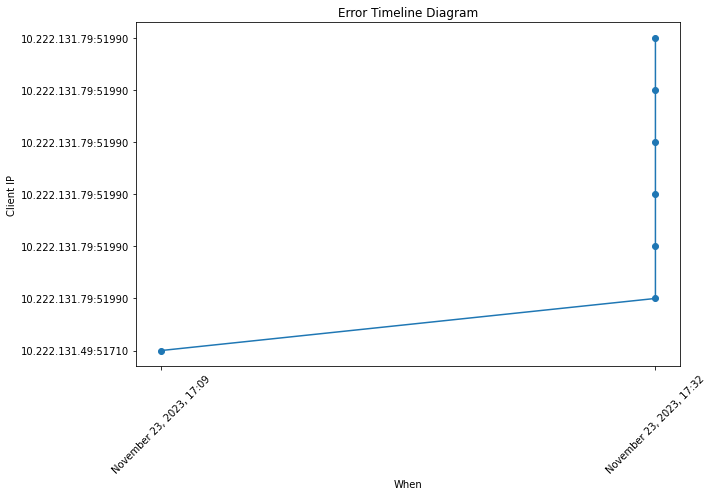

In [32]:
import re
import matplotlib.pyplot as plt
from datetime import datetime

error_log_path = '/var/log/apache2/error_log'

timestamps = []
client_ips = []

with open(error_log_path, 'r') as error_log:
    for line in error_log:
        if "/~mbayemirov" in line:
            match = re.match(r'\[(.*?)\] \[(.*?)\] \[pid (.*?)\] \[client (.*?)\] (.*?): (.*)', line)
            if match:
                timestamp_str = match.group(1)
                client_ip = match.group(4)

                # Convert the timestamp string to a datetime object
                # Use strptime format with millisecond precision
                date = datetime.strptime(timestamp_str, "%a %b %d %H:%M:%S.%f %Y")
                formatted_date = date.strftime("%B %d, %Y, %H:%M")

                timestamps.append(formatted_date)
                client_ips.append(client_ip)

# Sort the data based on timestamps
sorted_data = sorted(zip(timestamps, client_ips))

# Extract sorted timestamps and corresponding client IPs
sorted_timestamps, sorted_client_ips = zip(*sorted_data)

# Plot the timeline diagram with switched axes
plt.figure(figsize=(10, 7))
plt.plot(sorted_timestamps, range(1, len(sorted_timestamps) + 1), marker='o', linestyle='-')

# Beautify the plot
plt.title('Error Timeline Diagram')
plt.xlabel('When')
plt.ylabel('Client IP')
plt.yticks(range(1, len(sorted_timestamps) + 1), sorted_client_ips)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
